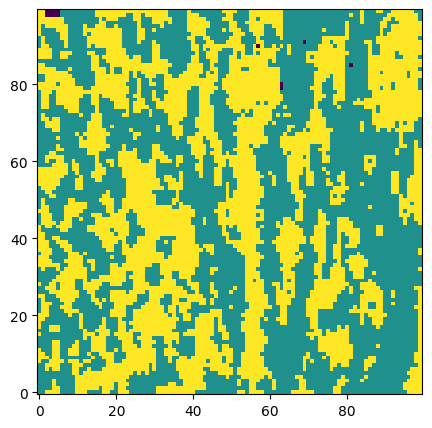

In [1]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from fibrosisanalysis.parsers import ImageLoader


heart = 'E11971_MYH7'
filename = 'E11971_12_SC2_NABL.png'
path = Path('/Users/arstanbek/Library/CloudStorage/OneDrive-UGent/data/')
loader = ImageLoader(path)
img = loader.load_slice_data(path.joinpath(heart, 'Images', filename))

image = img[1500:1600, 250:350]

plt.figure(figsize=(5, 5))
plt.imshow(image, origin='lower')
plt.show()

False


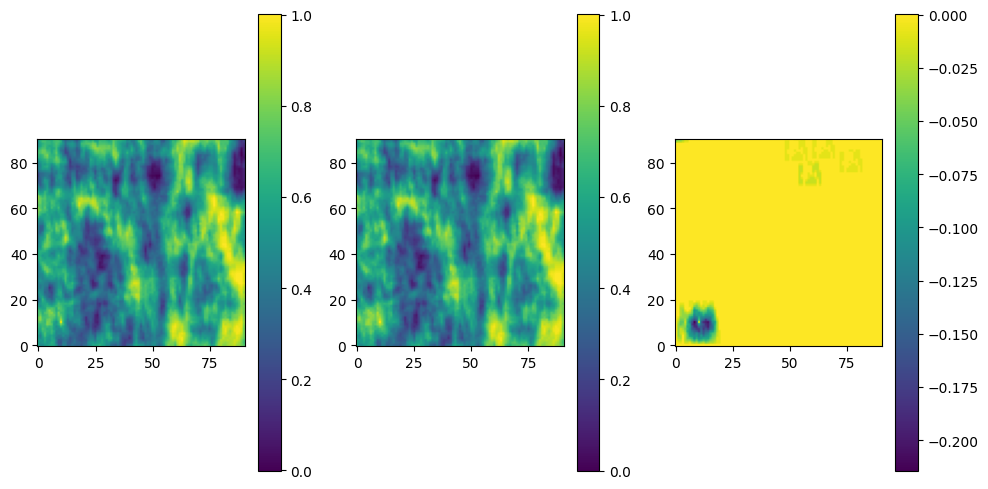

In [13]:
from scipy import signal


def two_corr(image, template):
    dist_fibr = signal.correlate((image == 2).astype(np.float32),
                                 (template == 2).astype(np.float32),
                                 mode='valid', method='fft')
    dist_myo = signal.correlate((image == 1).astype(np.float32),
                                (template == 1).astype(np.float32),
                                mode='valid', method='fft')
    dist = dist_fibr + dist_myo
    return dist / (template > 0).sum()


def one_corr(image, template):
    out = (image == 1).astype(np.float32)
    out[image == 2] = -1.
    temp = (template == 1).astype(np.float32)
    temp[template == 2] = -1.
    mist_match = signal.correlate((out).astype(np.float32),
                                  (temp).astype(np.float32),
                                  mode='valid', method='fft')
    return (1 + mist_match / (template > 0).sum()) / 2

template = image[10:20, 10:20]

res_two = two_corr(image.copy(), template)
res_one = one_corr(image.copy(), template)

print(np.all(res_two == res_one))

fig, axs = plt.subplots(1, 3, figsize=(10, 5))
pcm_0 = axs[0].imshow(res_two, origin='lower')
pcm_1 = axs[1].imshow(res_one, origin='lower')
pcm_2 = axs[2].imshow(res_two - res_one, origin='lower')

fig.colorbar(pcm_0, ax=axs[0])
fig.colorbar(pcm_1, ax=axs[1])
fig.colorbar(pcm_2, ax=axs[2])
plt.tight_layout()
plt.show()